In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [109]:
# Load the enhanced data
df = pd.read_csv('zenvy_payroll_risk.csv')

In [111]:
df.head()

,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary,Level,Weekly_Salary,Attendance_Rate,Leave_Frequency,Salary_Change_Pct,Overtime_Hours,Is_High_Risk
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416,Expert,27854.00,0.812362,14,3.321565,17,0
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271,Mid-level,23817.75,0.985214,1,4.381575,39,0
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064,Senior,17266.00,0.919598,9,5.662527,0,0
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091,Mid-level,23772.75,0.879598,11,6.951090,10,0
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450,Expert,33112.50,0.746806,1,4.041652,27,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         50 non-null     int64  
 1   Name               50 non-null     object 
 2   Department         50 non-null     object 
 3   Experience_Years   50 non-null     int64  
 4   Education_Level    50 non-null     object 
 5   Age                50 non-null     int64  
 6   Gender             50 non-null     object 
 7   City               50 non-null     object 
 8   Monthly_Salary     50 non-null     int64  
 9   Level              50 non-null     object 
 10  Weekly_Salary      50 non-null     float64
 11  Attendance_Rate    50 non-null     float64
 12  Leave_Frequency    50 non-null     int64  
 13  Salary_Change_Pct  50 non-null     float64
 14  Overtime_Hours     50 non-null     int64  
 15  Is_High_Risk       50 non-null     int64  
dtypes: float64(3), int64(7), obj

## Exploratory Data Analysis(EDA)

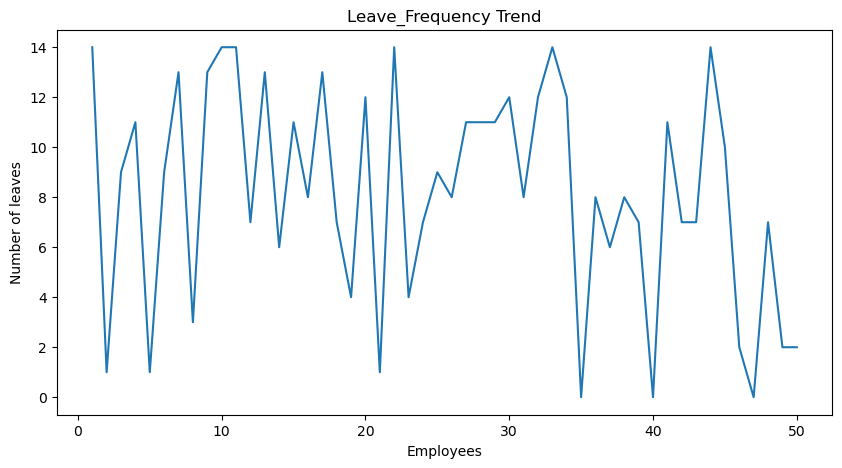

In [116]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['EmployeeID'], y=df['Leave_Frequency'])
plt.title('Leave_Frequency Trend')
plt.xlabel('Employees')
plt.ylabel('Number of leaves')
plt.show()

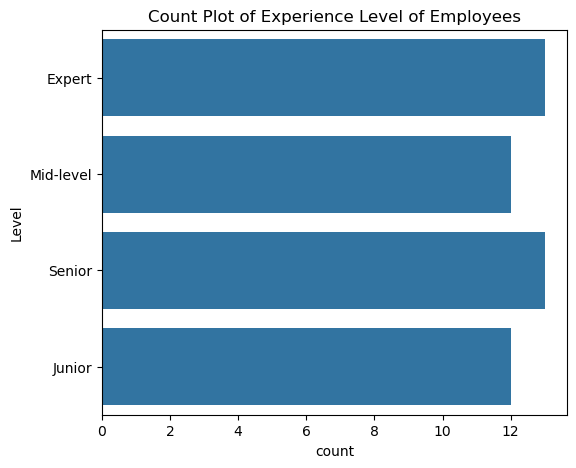

In [118]:
plt.figure(figsize = (6,5))
sns.countplot(y=df['Level'], data=df)
plt.title('Count Plot of Experience Level of Employees')
plt.show()

In [120]:
df['Education_Level'].value_counts()

Education_Level
Master         19
High School    12
PhD            10
Bachelor        9
Name: count, dtype: int64

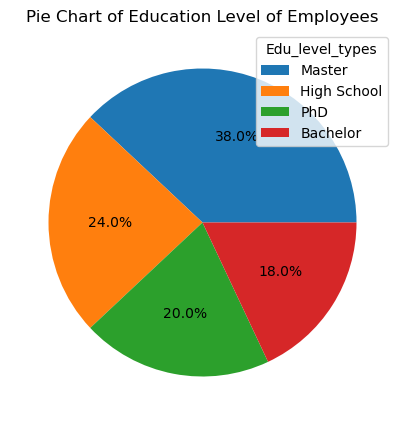

In [122]:
plt.figure(figsize=(15,5))
plt.pie(df['Education_Level'].value_counts().values, autopct ='%1.1f%%')
plt.legend(title = "Edu_level_types", labels =df['Education_Level'].value_counts().index )
plt.title('Pie Chart of Education Level of Employees')
plt.show()

In [124]:
corr_data = df.select_dtypes(include=['int64']).corr()

In [126]:
corr_data

,EmployeeID,Experience_Years,Age,Monthly_Salary,Leave_Frequency,Overtime_Hours,Is_High_Risk
EmployeeID,1.000000,-0.107681,-0.168997,-0.003808,-0.255101,0.116666,-0.093549
Experience_Years,-0.107681,1.000000,0.130837,0.074221,0.249058,-0.104038,0.009441
Age,-0.168997,0.130837,1.000000,0.060972,0.208672,0.051846,0.084911
Monthly_Salary,-0.003808,0.074221,0.060972,1.000000,0.051391,0.026420,0.274898
Leave_Frequency,-0.255101,0.249058,0.208672,0.051391,1.000000,-0.152862,0.335704
Overtime_Hours,0.116666,-0.104038,0.051846,0.026420,-0.152862,1.000000,-0.093392
Is_High_Risk,-0.093549,0.009441,0.084911,0.274898,0.335704,-0.093392,1.000000


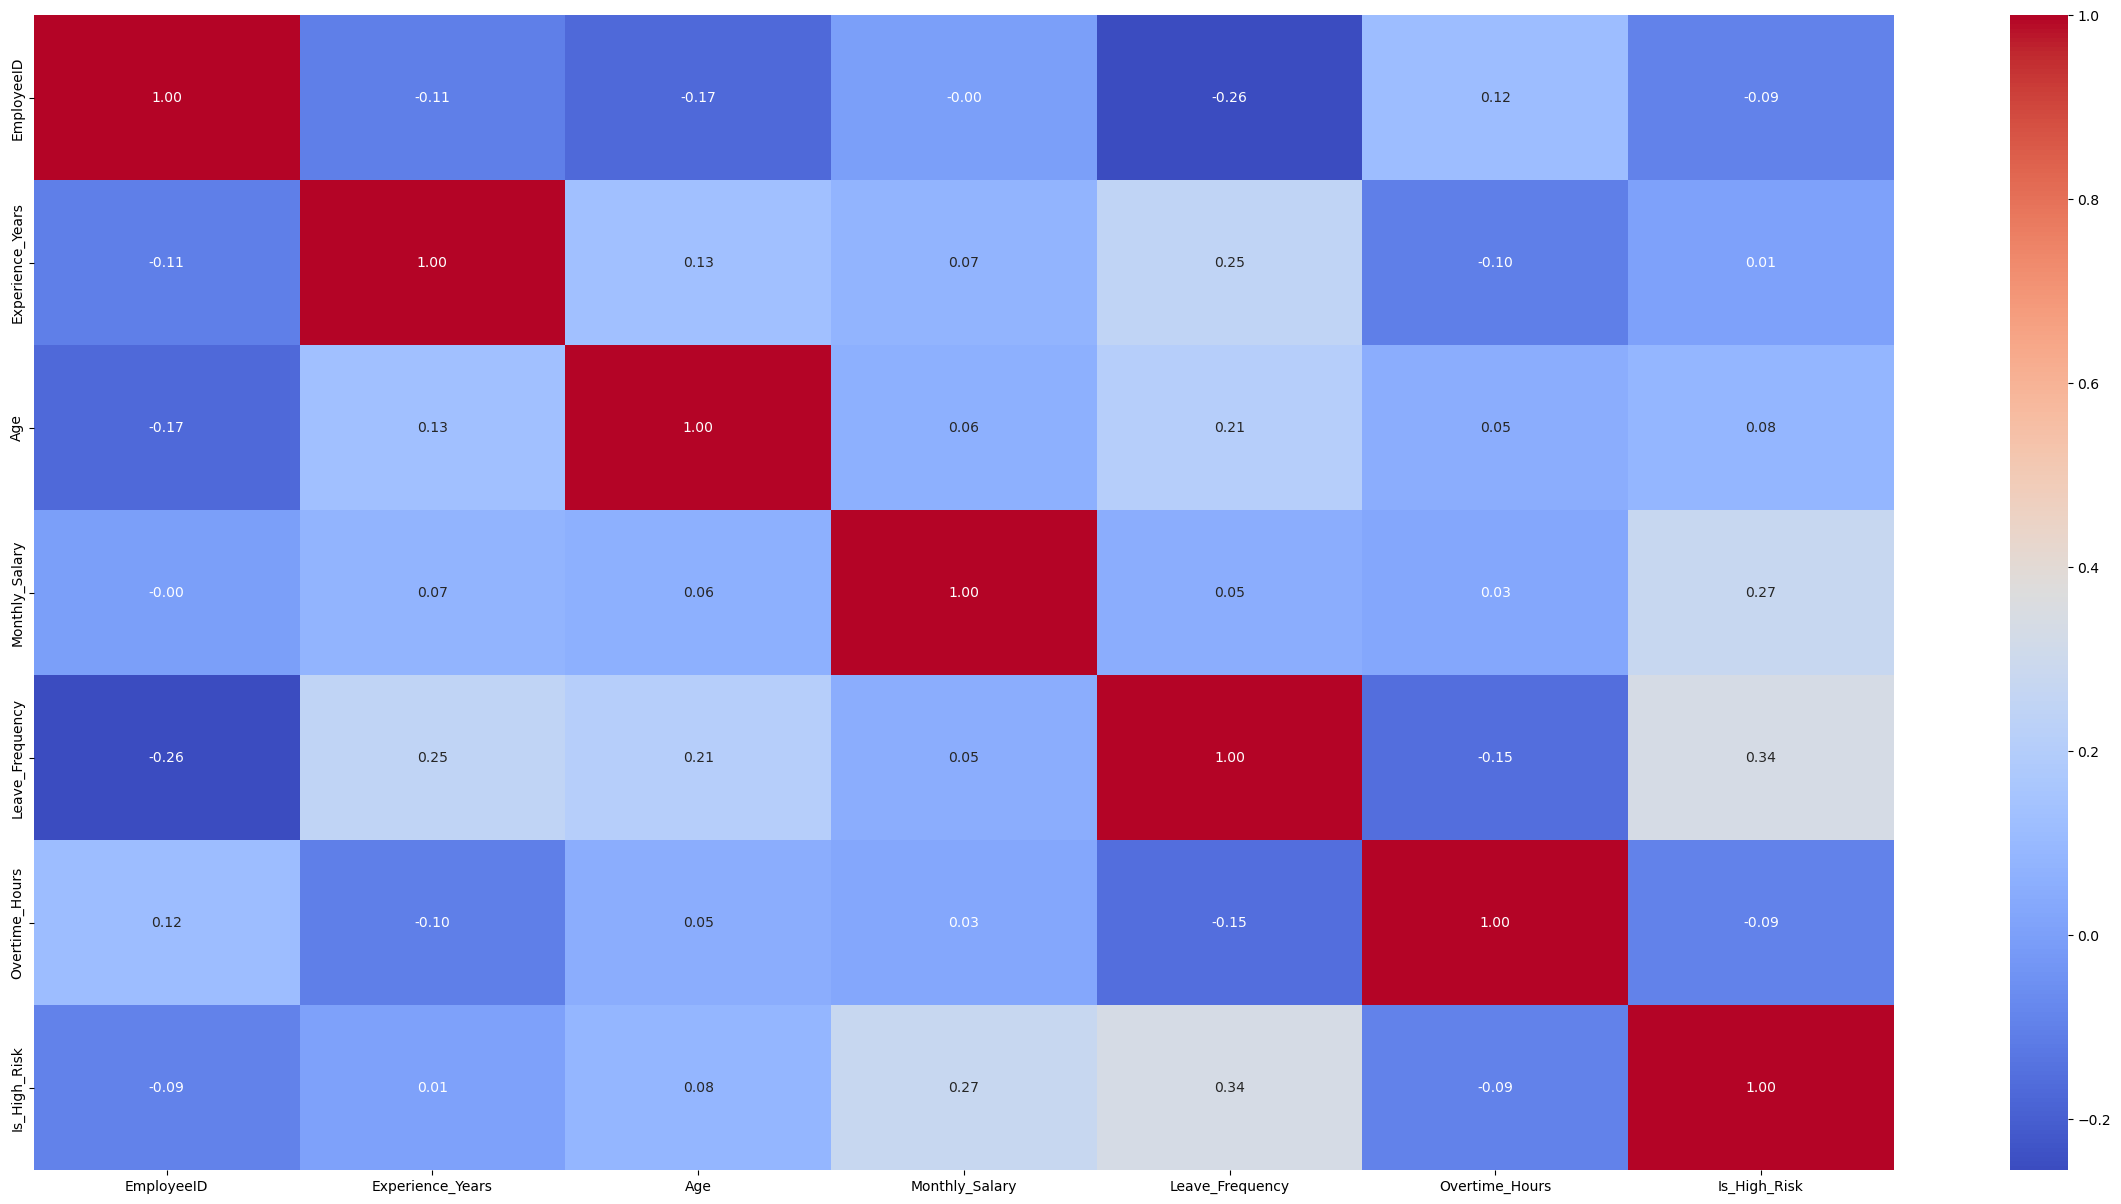

In [128]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr_data, fmt=".2f", annot= True, cmap= "coolwarm")
plt.show()

In [130]:
# Feature Selection
features = ['Experience_Years', 'Attendance_Rate', 'Leave_Frequency', 'Salary_Change_Pct', 'Overtime_Hours']
X = df[features]
y = df['Is_High_Risk']

In [132]:
# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(),
"Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [136]:
# Training and Comparison
comparison_data = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }
    comparison_data.append(metrics)

In [138]:
comparison_df = pd.DataFrame(comparison_data).round(4)

## Model Comparison Table

In [141]:
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.9,1.0,0.5,0.6667,0.9375
1,Random Forest,0.9,1.0,0.5,0.6667,1.0000
2,XGBoost,0.8,0.5,0.5,0.5000,0.8750
3,Gradient Boosting,0.9,1.0,0.5,0.6667,1.0000


## Feature Importance Analysis

In [144]:
#Feature Importance Analysis (Using Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [146]:
feature_importance_df

,Feature,Importance
1,Attendance_Rate,0.336604
3,Salary_Change_Pct,0.309821
4,Overtime_Hours,0.143486
2,Leave_Frequency,0.137040
0,Experience_Years,0.073050


C:\Users\osrnm\AppData\Local\Temp\ipykernel_22896\1461130268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


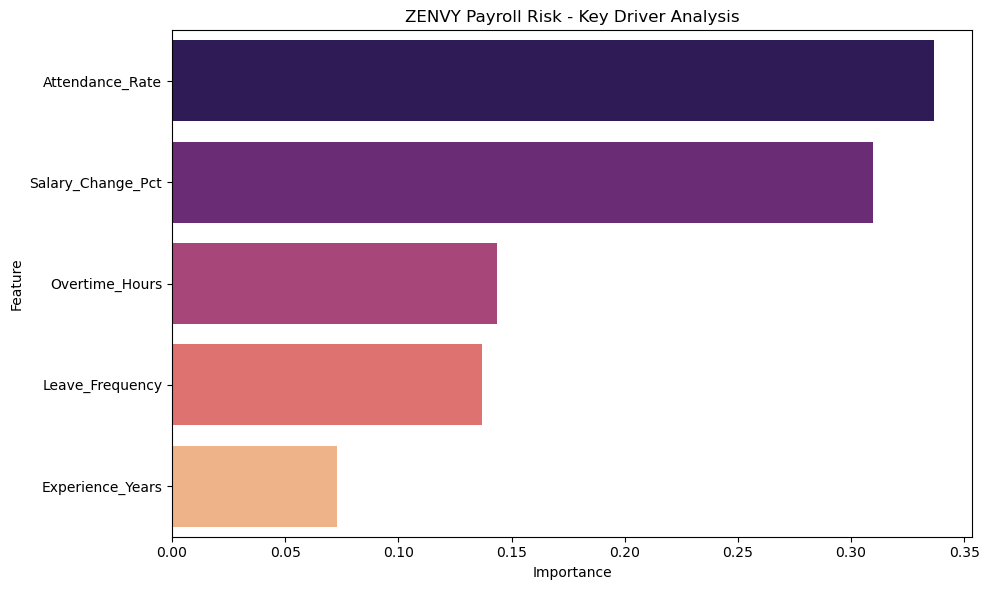

In [148]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('ZENVY Payroll Risk - Key Driver Analysis')
plt.tight_layout()
plt.show()

## Predicting Risk for the Entire Employee List

In [150]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [152]:
#TRAIN the best_model
best_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [154]:
df['Risk_Probability'] = best_model.predict_proba(X)[:, 1]
df['Is_Predicted_Risk'] = best_model.predict(X)

In [156]:
high_risk_employees = df[df['Is_Predicted_Risk'] == 1]

In [158]:
print("Found high-risk records for the following employees:")
print(high_risk_employees[['Name', 'Department', 'Risk_Probability']])

Found high-risk records for the following employees:
           Name  Department  Risk_Probability
6    Employee_7          IT              0.90
10  Employee_11   Marketing              0.94
12  Employee_13  Operations              0.82
15  Employee_16     Finance              0.82
19  Employee_20   Marketing              0.88
21  Employee_22  Operations              0.67
29  Employee_30   Marketing              0.92
32  Employee_33   Marketing              0.78
34  Employee_35          IT              0.80
40  Employee_41   Marketing              0.73
